In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Предпирятие производит продукцию. Выпуск задан функцией $$ F(K,S,L) = K^\alpha * S^\beta * L^{1-\alpha-\beta}$$ 
$K$ — стоимость оборудования, тыс. руб. \
$S$ — инвестиции, тыс. руб. \
$L$ — затраты труда, в чел.-час. \
$\alpha$ = 0.3 \
$\beta$ = 0.4 \
Обслуживание оборудования обходится в $\textbf{a}$% от его стоимости, выплаты
по кредиту - $\textbf{b}$%, чел.-час. стоит $\textbf{d}$ руб. Цена 1 ед. продукции - $\textbf{P}$ руб. \
Как распорядиться суммой в 1 млн. руб., чтобы добиться максимальной
выручки? Сколько привлечь инвестиций, на какую сумму закупить оборудования, сколько потребуется чел.-час?

In [2]:
alpha = 0.3
beta = 0.4
a = 6
b = 8
d = 100
P = 150

Выручка составит, тыс. руб $$ 150F(K,S,L) = 150K^{0.3}S^{0.4}L^{0.3} $$ 

Затраты равны, тыс. руб $$0.06K + 0.08S + 0.1L$$ 
$0.06K$ — обслуживание оборудования \
$0.08S$ — проценты по кредиту \
$0.1L$ — заработная плата (100руб = 0.1тыс.руб)

Получаем задачу $$
\begin{cases} 
150K^{0.3}S^{0.4}L^{0.3} \rightarrow max \\
0.06K + 0.08S + 0.1L$ = 1000 \\
K\ge0 \\
S\ge0 \\
L\ge0
\end{cases} $$

### Mетод множителей Лагранжа

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} - \lambda(0.06K + 0.08S + 0.1L - 1000)\longrightarrow max \\ \text{где } \lambda \text { — множитель Лагранжа} $$ 

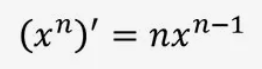

Находим частные производные и, приравнивая их к нулю, получаем систему уравнений
\begin{cases}
45K^{-0.7}S^{0.4}L^{0.3} - 0.06\lambda = 0\\
60K^{0.3}S^{-0.6}L^{0.3} - 0.08\lambda = 0\\
45K^{0.3}S^{0.4}L^{-0.7} - 0.1\lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

После уножения соответствующих столбцов на 100/6, 100/8 и 10 получаем
\begin{cases}
750K^{-0.7}S^{0.4}L^{0.3} - \lambda = 0 \\
750K^{0.3}S^{-0.6}L^{0.3} - \lambda = 0 \\
450K^{0.3}S^{0.4}L^{-0.7} - \lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

Из 1-го и 2-го уравнения $K^{-0.7}S^{0.4}L^{0.3} = K^{0.3}S^{-0.6}L^{0.3} \text{, откуда} \text{ } S = K $

Из 2-го и 3-го уравнения $ K^{0.3}S^{-0.6}L^{0.3} = 0.6K^{0.3}S^{0.4}L^{-0.7} \text{, откуда} \text{ } L = 0.6S $

Подставив в 4-е уравнение получаем $ 0.06S + 0.08S + 0.1(0.6S) = 1000 \text{, откуда} \text{ } S = 5000 \text{, тогда K = 5000, L = 3000} $

####   Ответ: Следует приобрести оборудование на 5 млн. руб., привлечь инфестиций 5 млн. руб. и затратить 3 тыс. чел.-час.

In [3]:
K = 5000
S = 5000
L = 3000

Проверка результата. Вычислим затраты, тыс.руб, $0.06K + 0.08S + 0.1L = 1000 $

In [4]:
0.06*S + 0.08*K + 0.1*L           # 1000 тыс.руб = 1млн руб

1000.0

Посчитаем выручку, тыс.руб, $150K^{0.3}S^{0.4}L^{0.3} $:

In [5]:
round(150*pow(K,0.3)*pow(S,0.4)*pow(L,0.3)/1000, 0)

643.0

Функция Лагранжа $$150K^{0.3}S^{0.4}L^{0.3} + 0.06K + 0.08S + 0.1L - 1000\longrightarrow max $$ 

Функция минимизации $$-150K^{0.3}S^{0.4}L^{0.3} - 0.06K - 0.08S - 0.1L + 1000\longrightarrow min $$ 

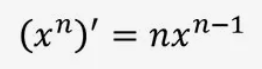

Находим частные производные и, приравнивая их к нулю, получаем систему уравнений
\begin{cases}
45K^{-0.7}S^{0.4}L^{0.3} - 0.06\lambda = 0\\
60K^{0.3}S^{-0.6}L^{0.3} - 0.08\lambda = 0\\
45K^{0.3}S^{0.4}L^{-0.7} - 0.1\lambda = 0 \\
0.06K + 0.08S + 0.1L = 1000 \\
\end{cases} 

In [8]:
def df(K: np.array, S: np.array, L: np.array) -> np.array:
    dfK = -45*np.power(K,-0.7)*np.power(S,0.4)*np.power(L,0.3)/1000 - 0.06
    dfS = -60*np.power(K,0.3)*np.power(S,-0.6)*np.power(L,0.3)/1000 - 0.08
    dfL = -45*np.power(K,0.3)*np.power(S,0.4)*np.power(L,-0.7)/1000 - 0.1
    return np.array([dfK,dfS,dfL])

In [14]:
def f_3(x):
    return 150*np.power(x[0],0.3)*np.power(x[1],0.4)*np.power(x[2],0.3)

## CMA-ES - алгоритм

https://habr.com/ru/companies/otus/articles/801463/

In [16]:
import optuna
def objective(trial):
    K = trial.suggest_float('K', 3000, 7000)
    S = trial.suggest_float('S', 3000, 7000)
    L = trial.suggest_float('L', 1000, 5000)
    fun = 150*np.power(K,0.3)*np.power(S,0.4)*np.power(L,0.3)
    pen = 0
    if (0.06*K + 0.08*S + 0.1*L-1000) > 0:
        pen = 100000 + 200000*(1000 - (0.06*K + 0.08*S + 0.1*L))
    return (fun+pen)

study = optuna.create_study(study_name="max_profit", sampler=optuna.samplers.CmaEsSampler(), direction="maximize")
study.optimize(objective , n_trials=2000)

print(study.best_params)

[I 2024-04-09 21:25:17,354] A new study created in memory with name: max_profit
[I 2024-04-09 21:25:17,355] Trial 0 finished with value: -742007.407800862 and parameters: {'K': 3689.983018451489, 'S': 6741.333031384169, 'L': 2466.2530136353853}. Best is trial 0 with value: -742007.407800862.
[I 2024-04-09 21:25:17,610] Trial 1 finished with value: -14991767.465151438 and parameters: {'K': 5877.9066327858945, 'S': 5293.046903495528, 'L': 3028.053375144783}. Best is trial 0 with value: -742007.407800862.
[I 2024-04-09 21:25:17,611] Trial 2 finished with value: 533256.0393106124 and parameters: {'K': 4332.792924409445, 'S': 3874.1863584486427, 'L': 2600.9967041078853}. Best is trial 2 with value: 533256.0393106124.
[I 2024-04-09 21:25:17,613] Trial 3 finished with value: 519310.7684106541 and parameters: {'K': 3884.113107628651, 'S': 3939.702956768472, 'L': 2597.429234622996}. Best is trial 2 with value: 533256.0393106124.
[I 2024-04-09 21:25:17,615] Trial 4 finished with value: -16320954

[I 2024-04-09 21:25:17,684] Trial 38 finished with value: -11495762.071590226 and parameters: {'K': 5460.249501601943, 'S': 5286.7753275465075, 'L': 3108.3579158289244}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,686] Trial 39 finished with value: -6822768.873922928 and parameters: {'K': 5668.9197831008905, 'S': 4198.104334415444, 'L': 3619.2578931589683}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,688] Trial 40 finished with value: 622282.3262065849 and parameters: {'K': 5121.411860817778, 'S': 4865.874305107635, 'L': 2716.7508221495114}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,691] Trial 41 finished with value: -2814775.751010144 and parameters: {'K': 6236.566010388433, 'S': 4462.658541477949, 'L': 2866.0741087029455}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,694] Trial 42 finished with value: 626514.9059497343 and parameters: {'K': 4692.756829677585, 'S': 4101.8920081

[I 2024-04-09 21:25:17,761] Trial 77 finished with value: 619713.2883728906 and parameters: {'K': 5844.778828211596, 'S': 4266.000977403357, 'L': 2798.138130611933}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,763] Trial 78 finished with value: 628517.0738933261 and parameters: {'K': 5056.972974954442, 'S': 4545.482516376067, 'L': 3114.7422559170395}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,765] Trial 79 finished with value: 627461.5278588493 and parameters: {'K': 5441.530976104887, 'S': 4212.1384553050875, 'L': 3186.115548147867}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,766] Trial 80 finished with value: -432442.78461597394 and parameters: {'K': 5836.380011672755, 'S': 4460.69530919142, 'L': 2988.396461612141}. Best is trial 32 with value: 640151.9437901491.
[I 2024-04-09 21:25:17,768] Trial 81 finished with value: 625523.0080994411 and parameters: {'K': 5445.319795829009, 'S': 4348.752034495241, 

[I 2024-04-09 21:25:17,841] Trial 116 finished with value: 628809.4956411663 and parameters: {'K': 4794.2825478951345, 'S': 5100.060358570354, 'L': 2822.292756188365}. Best is trial 88 with value: 640464.9185895079.
[I 2024-04-09 21:25:17,843] Trial 117 finished with value: 627549.9779524344 and parameters: {'K': 4645.884873292757, 'S': 4757.530438783287, 'L': 3174.0443269750212}. Best is trial 88 with value: 640464.9185895079.
[I 2024-04-09 21:25:17,845] Trial 118 finished with value: 621012.707500113 and parameters: {'K': 5041.799807148437, 'S': 4964.632065238088, 'L': 2668.470495901769}. Best is trial 88 with value: 640464.9185895079.
[I 2024-04-09 21:25:17,846] Trial 119 finished with value: 633744.4268103818 and parameters: {'K': 5183.715660195769, 'S': 5095.855858191222, 'L': 2682.1246790376235}. Best is trial 88 with value: 640464.9185895079.
[I 2024-04-09 21:25:17,849] Trial 120 finished with value: 619683.8258771322 and parameters: {'K': 4568.85865881669, 'S': 5482.78501604946

[I 2024-04-09 21:25:17,926] Trial 154 finished with value: 635362.3938087324 and parameters: {'K': 5290.131359767902, 'S': 4884.343738877558, 'L': 2804.7408514296194}. Best is trial 141 with value: 640550.3402881696.
[I 2024-04-09 21:25:17,930] Trial 155 finished with value: -258379.90329654177 and parameters: {'K': 5381.744179472602, 'S': 5348.449375820508, 'L': 2542.264064280568}. Best is trial 141 with value: 640550.3402881696.
[I 2024-04-09 21:25:17,931] Trial 156 finished with value: 443315.4920045758 and parameters: {'K': 5328.0559828848345, 'S': 4900.6008216886485, 'L': 2897.7119957499604}. Best is trial 141 with value: 640550.3402881696.
[I 2024-04-09 21:25:17,933] Trial 157 finished with value: 635772.9158793398 and parameters: {'K': 4870.8949873315705, 'S': 4891.298149537094, 'L': 3046.9238343273337}. Best is trial 141 with value: 640550.3402881696.
[I 2024-04-09 21:25:17,935] Trial 158 finished with value: 634712.136661826 and parameters: {'K': 5164.262890139493, 'S': 4926.2

[I 2024-04-09 21:25:18,004] Trial 192 finished with value: 641405.6957627 and parameters: {'K': 5076.846045951722, 'S': 5056.589098036566, 'L': 2880.0562152470666}. Best is trial 185 with value: 669811.7792614655.
[I 2024-04-09 21:25:18,006] Trial 193 finished with value: 251509.29955069505 and parameters: {'K': 5416.565132304875, 'S': 4487.9594016133715, 'L': 3184.2471447500525}. Best is trial 185 with value: 669811.7792614655.
[I 2024-04-09 21:25:18,007] Trial 194 finished with value: 305903.9504524865 and parameters: {'K': 5340.995576158027, 'S': 4545.536032013759, 'L': 3180.8258894918195}. Best is trial 185 with value: 669811.7792614655.
[I 2024-04-09 21:25:18,008] Trial 195 finished with value: 640227.399958143 and parameters: {'K': 5043.540190055066, 'S': 5067.771094702161, 'L': 2872.8868393171633}. Best is trial 185 with value: 669811.7792614655.
[I 2024-04-09 21:25:18,010] Trial 196 finished with value: 640480.9526715188 and parameters: {'K': 5022.978656401595, 'S': 4970.613925

[I 2024-04-09 21:25:18,081] Trial 230 finished with value: 438139.2105218427 and parameters: {'K': 5246.261566187279, 'S': 4959.657277577666, 'L': 2899.814140002515}. Best is trial 203 with value: 719891.4091972271.
[I 2024-04-09 21:25:18,083] Trial 231 finished with value: 641717.3232325417 and parameters: {'K': 5253.75314310258, 'S': 4907.306760567385, 'L': 2901.2227560419037}. Best is trial 203 with value: 719891.4091972271.
[I 2024-04-09 21:25:18,086] Trial 232 finished with value: 587460.2737425019 and parameters: {'K': 5269.9894188267335, 'S': 4725.729431606014, 'L': 3065.2108110607996}. Best is trial 203 with value: 719891.4091972271.
[I 2024-04-09 21:25:18,088] Trial 233 finished with value: 569181.5524640543 and parameters: {'K': 5209.455967917618, 'S': 4875.712439944329, 'L': 2982.484922211558}. Best is trial 203 with value: 719891.4091972271.
[I 2024-04-09 21:25:18,091] Trial 234 finished with value: 642935.3144981728 and parameters: {'K': 5187.345748973841, 'S': 4775.665812

[I 2024-04-09 21:25:18,164] Trial 269 finished with value: 357654.85610679025 and parameters: {'K': 5366.90486528777, 'S': 4774.500812292997, 'L': 2979.5692245829114}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,166] Trial 270 finished with value: 716418.2768068549 and parameters: {'K': 5189.854589320612, 'S': 4871.314293557201, 'L': 2990.3799448527016}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,167] Trial 271 finished with value: 642971.6336652938 and parameters: {'K': 5293.657569507315, 'S': 4882.408244743401, 'L': 2917.8785794766764}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,169] Trial 272 finished with value: 734220.4322472343 and parameters: {'K': 5378.537293294912, 'S': 4939.401318826805, 'L': 2821.7737849072514}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,171] Trial 273 finished with value: 538304.0645898003 and parameters: {'K': 5263.35281260019, 'S': 4772.817822377602,

[I 2024-04-09 21:25:18,244] Trial 308 finished with value: 715324.8543232172 and parameters: {'K': 5241.08159791083, 'S': 4830.877750738875, 'L': 2992.040536473086}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,247] Trial 309 finished with value: 707063.9611250454 and parameters: {'K': 5261.633913196683, 'S': 4876.762991161881, 'L': 2943.415286074919}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,249] Trial 310 finished with value: 643034.3146671918 and parameters: {'K': 5266.858433226533, 'S': 4870.731129028738, 'L': 2943.059977339011}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,250] Trial 311 finished with value: 642901.9192029447 and parameters: {'K': 5273.411652618949, 'S': 4920.019243068664, 'L': 2898.216341610294}. Best is trial 240 with value: 741058.97739622.
[I 2024-04-09 21:25:18,251] Trial 312 finished with value: 708305.0554049354 and parameters: {'K': 5273.282005260236, 'S': 4878.8909673529, 'L': 

[I 2024-04-09 21:25:18,350] Trial 347 finished with value: 740101.4592580028 and parameters: {'K': 5301.204875965698, 'S': 4884.652377789969, 'L': 2911.6978799881736}. Best is trial 338 with value: 741616.2207609006.
[I 2024-04-09 21:25:18,353] Trial 348 finished with value: 732478.7521484867 and parameters: {'K': 5303.9484775578185, 'S': 4894.322308738393, 'L': 2902.697473191487}. Best is trial 338 with value: 741616.2207609006.
[I 2024-04-09 21:25:18,355] Trial 349 finished with value: 642962.5207011915 and parameters: {'K': 5295.339786426334, 'S': 4882.391434286459, 'L': 2916.8272157305314}. Best is trial 338 with value: 741616.2207609006.
[I 2024-04-09 21:25:18,358] Trial 350 finished with value: 729141.5380903125 and parameters: {'K': 5281.101811458959, 'S': 4878.404968802541, 'L': 2929.3107054295115}. Best is trial 338 with value: 741616.2207609006.
[I 2024-04-09 21:25:18,361] Trial 351 finished with value: 643002.218492021 and parameters: {'K': 5279.8547008740825, 'S': 4886.8044

[I 2024-04-09 21:25:18,435] Trial 385 finished with value: 730792.5146845623 and parameters: {'K': 5278.0048619960035, 'S': 4872.589904015339, 'L': 2935.738523090362}. Best is trial 379 with value: 742724.2101834131.
[I 2024-04-09 21:25:18,439] Trial 386 finished with value: 643002.1278410219 and parameters: {'K': 5277.68885278957, 'S': 4897.547336211257, 'L': 2915.111681430082}. Best is trial 379 with value: 742724.2101834131.
[I 2024-04-09 21:25:18,442] Trial 387 finished with value: 734064.9509734577 and parameters: {'K': 5275.046699700141, 'S': 4894.464484265953, 'L': 2919.8499890033145}. Best is trial 379 with value: 742724.2101834131.
[I 2024-04-09 21:25:18,445] Trial 388 finished with value: 738317.6050957686 and parameters: {'K': 5275.2055117671425, 'S': 4887.149794452529, 'L': 2925.3931709790613}. Best is trial 379 with value: 742724.2101834131.
[I 2024-04-09 21:25:18,448] Trial 389 finished with value: 735751.6486371977 and parameters: {'K': 5282.825265994605, 'S': 4890.75706

[I 2024-04-09 21:25:18,529] Trial 423 finished with value: 742430.6718037118 and parameters: {'K': 5285.518934359026, 'S': 4890.237035005242, 'L': 2916.5273561218446}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,530] Trial 424 finished with value: 739843.0217378967 and parameters: {'K': 5290.515598634294, 'S': 4890.360053009601, 'L': 2913.559944481199}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,532] Trial 425 finished with value: 738203.9808190129 and parameters: {'K': 5275.812991155132, 'S': 4886.604902339244, 'L': 2925.4702089624607}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,533] Trial 426 finished with value: 737571.4844041755 and parameters: {'K': 5280.656979574618, 'S': 4891.717439342578, 'L': 2918.504718183946}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,536] Trial 427 finished with value: 734992.5829428331 and parameters: {'K': 5282.740118743654, 'S': 4889.3856342792

[I 2024-04-09 21:25:18,619] Trial 462 finished with value: 642984.1791074337 and parameters: {'K': 5288.986431024983, 'S': 4889.624710327118, 'L': 2914.8996231382107}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,622] Trial 463 finished with value: 741321.2440203814 and parameters: {'K': 5296.384226522205, 'S': 4891.145662680679, 'L': 2909.33513177625}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,624] Trial 464 finished with value: 741743.478044407 and parameters: {'K': 5289.968947800966, 'S': 4892.263960215702, 'L': 2912.2695226934393}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,626] Trial 465 finished with value: 741385.9783291675 and parameters: {'K': 5293.288514204398, 'S': 4892.365794296451, 'L': 2910.213697823855}. Best is trial 412 with value: 742927.359540644.
[I 2024-04-09 21:25:18,628] Trial 466 finished with value: 740855.5336911401 and parameters: {'K': 5293.761893514402, 'S': 4893.18097989536,

[I 2024-04-09 21:25:18,713] Trial 501 finished with value: 642993.0602814418 and parameters: {'K': 5286.1694748156215, 'S': 4889.903267330617, 'L': 2916.3657036645527}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,715] Trial 502 finished with value: 642988.9293119332 and parameters: {'K': 5287.467757569448, 'S': 4890.503406307643, 'L': 2915.1101419977545}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,718] Trial 503 finished with value: 742496.2686666757 and parameters: {'K': 5288.796103647372, 'S': 4890.939477866645, 'L': 2913.9952685525727}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,720] Trial 504 finished with value: 642989.8033858468 and parameters: {'K': 5287.234772533812, 'S': 4889.993006296942, 'L': 2915.6575263503755}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,724] Trial 505 finished with value: 742427.0224814201 and parameters: {'K': 5289.210593867085, 'S': 4890.619

[I 2024-04-09 21:25:18,804] Trial 539 finished with value: 742754.5058514493 and parameters: {'K': 5290.16548135309, 'S': 4890.649524886976, 'L': 2913.3924314841192}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,807] Trial 540 finished with value: 642986.5756125588 and parameters: {'K': 5288.21305465626, 'S': 4891.005250993314, 'L': 2914.264993732236}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,809] Trial 541 finished with value: 742497.5004796231 and parameters: {'K': 5289.378604882459, 'S': 4890.987811952398, 'L': 2913.6069428701358}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,810] Trial 542 finished with value: 742861.0740407185 and parameters: {'K': 5288.353814873926, 'S': 4890.8640972813755, 'L': 2914.3027187636653}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,812] Trial 543 finished with value: 742750.5276430427 and parameters: {'K': 5288.187943961386, 'S': 4890.533516

[I 2024-04-09 21:25:18,901] Trial 577 finished with value: 642985.3578421682 and parameters: {'K': 5288.628855189641, 'S': 4891.1618944025, 'L': 2913.8930419557673}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,903] Trial 578 finished with value: 642983.8507516112 and parameters: {'K': 5288.973953659817, 'S': 4891.403529107822, 'L': 2913.4882373601035}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,906] Trial 579 finished with value: 742901.9657890706 and parameters: {'K': 5290.477013675865, 'S': 4891.399628414848, 'L': 2912.59796599783}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,909] Trial 580 finished with value: 742954.8007588236 and parameters: {'K': 5289.164984847778, 'S': 4891.304416861607, 'L': 2913.458918823745}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:18,911] Trial 581 finished with value: 642985.3485859733 and parameters: {'K': 5288.586578585898, 'S': 4891.337985718

[I 2024-04-09 21:25:19,005] Trial 615 finished with value: 742940.9641630519 and parameters: {'K': 5290.14502525283, 'S': 4891.737811964602, 'L': 2912.524703508117}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:19,007] Trial 616 finished with value: 742919.0540233364 and parameters: {'K': 5290.920094595764, 'S': 4891.792897004356, 'L': 2912.016564318961}. Best is trial 496 with value: 742979.0800778463.
[I 2024-04-09 21:25:19,011] Trial 617 finished with value: 742980.1961671531 and parameters: {'K': 5289.168183132015, 'S': 4891.239473602585, 'L': 2913.507681201632}. Best is trial 617 with value: 742980.1961671531.
[I 2024-04-09 21:25:19,014] Trial 618 finished with value: 742952.8333251218 and parameters: {'K': 5289.5108087212375, 'S': 4891.518322610847, 'L': 2913.0803378826413}. Best is trial 617 with value: 742980.1961671531.
[I 2024-04-09 21:25:19,017] Trial 619 finished with value: 642983.5575066857 and parameters: {'K': 5289.170881259448, 'S': 4891.1995419

[I 2024-04-09 21:25:19,099] Trial 653 finished with value: 742964.8911450676 and parameters: {'K': 5287.540564357105, 'S': 4890.965747767145, 'L': 2914.7042706284624}. Best is trial 647 with value: 742983.7052452508.
[I 2024-04-09 21:25:19,100] Trial 654 finished with value: 742955.0773343263 and parameters: {'K': 5286.385201807798, 'S': 4890.801954674642, 'L': 2915.5292043070986}. Best is trial 647 with value: 742983.7052452508.
[I 2024-04-09 21:25:19,103] Trial 655 finished with value: 642987.4996408258 and parameters: {'K': 5287.97966928618, 'S': 4891.011612470644, 'L': 2914.4025217034805}. Best is trial 647 with value: 742983.7052452508.
[I 2024-04-09 21:25:19,106] Trial 656 finished with value: 742949.1362021012 and parameters: {'K': 5286.167263261252, 'S': 4890.648332299588, 'L': 2915.7832010316224}. Best is trial 647 with value: 742983.7052452508.
[I 2024-04-09 21:25:19,108] Trial 657 finished with value: 742973.6162928204 and parameters: {'K': 5287.837806993963, 'S': 4890.95374

[I 2024-04-09 21:25:19,180] Trial 691 finished with value: 742988.0912728177 and parameters: {'K': 5287.434979211892, 'S': 4890.757189117236, 'L': 2914.9333255785173}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,182] Trial 692 finished with value: 742969.9372920528 and parameters: {'K': 5288.334736046391, 'S': 4890.937313300407, 'L': 2914.250133764831}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,184] Trial 693 finished with value: 742982.0939165596 and parameters: {'K': 5288.377057437183, 'S': 4891.036484392608, 'L': 2914.144785498431}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,186] Trial 694 finished with value: 742987.0096566237 and parameters: {'K': 5287.719056209957, 'S': 4890.695445800501, 'L': 2914.8122834283777}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,189] Trial 695 finished with value: 642990.8776276534 and parameters: {'K': 5286.969360235571, 'S': 4890.672120

[I 2024-04-09 21:25:19,281] Trial 729 finished with value: 642988.0691947845 and parameters: {'K': 5287.826983421772, 'S': 4890.631785077127, 'L': 2914.7970872574288}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,282] Trial 730 finished with value: 742973.1046659398 and parameters: {'K': 5287.052200855935, 'S': 4890.594318228641, 'L': 2915.2941057834787}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,284] Trial 731 finished with value: 742967.1689204677 and parameters: {'K': 5287.168145375521, 'S': 4890.822046905279, 'L': 2915.0426312187947}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,288] Trial 732 finished with value: 742972.8052521935 and parameters: {'K': 5287.433436644674, 'S': 4890.73078927761, 'L': 2914.9561385442207}. Best is trial 691 with value: 742988.0912728177.
[I 2024-04-09 21:25:19,291] Trial 733 finished with value: 742978.873239009 and parameters: {'K': 5286.458567957219, 'S': 4890.404866

[I 2024-04-09 21:25:19,377] Trial 768 finished with value: 742994.0881238285 and parameters: {'K': 5285.378878451951, 'S': 4890.313523587056, 'L': 2916.5219556913553}. Best is trial 741 with value: 742994.77161428.
[I 2024-04-09 21:25:19,379] Trial 769 finished with value: 642991.8641024883 and parameters: {'K': 5286.667345494312, 'S': 4890.666564496872, 'L': 2915.466164494427}. Best is trial 741 with value: 742994.77161428.
[I 2024-04-09 21:25:19,381] Trial 770 finished with value: 642994.7269174027 and parameters: {'K': 5285.8079175708135, 'S': 4890.362930735626, 'L': 2916.224870803633}. Best is trial 741 with value: 742994.77161428.
[I 2024-04-09 21:25:19,383] Trial 771 finished with value: 642995.022623251 and parameters: {'K': 5285.73495299573, 'S': 4890.142919490413, 'L': 2916.4445386143534}. Best is trial 741 with value: 742994.77161428.
[I 2024-04-09 21:25:19,385] Trial 772 finished with value: 742990.0466963663 and parameters: {'K': 5286.207302312008, 'S': 4890.407323527438, '

[I 2024-04-09 21:25:19,480] Trial 807 finished with value: 742996.9482417752 and parameters: {'K': 5284.858120395403, 'S': 4890.185165854386, 'L': 2916.9370383996957}. Best is trial 807 with value: 742996.9482417752.
[I 2024-04-09 21:25:19,482] Trial 808 finished with value: 742993.2667359565 and parameters: {'K': 5285.612186313145, 'S': 4890.309058320584, 'L': 2916.3855471400784}. Best is trial 807 with value: 742996.9482417752.
[I 2024-04-09 21:25:19,484] Trial 809 finished with value: 742993.4757477586 and parameters: {'K': 5284.8578137474215, 'S': 4890.188670736034, 'L': 2916.9345926783053}. Best is trial 807 with value: 742996.9482417752.
[I 2024-04-09 21:25:19,486] Trial 810 finished with value: 742993.5756922468 and parameters: {'K': 5285.448602796421, 'S': 4890.4568750092585, 'L': 2916.3654521936414}. Best is trial 807 with value: 742996.9482417752.
[I 2024-04-09 21:25:19,488] Trial 811 finished with value: 742995.5483628645 and parameters: {'K': 5284.961038448582, 'S': 4890.32

[I 2024-04-09 21:25:19,584] Trial 845 finished with value: 742991.9174811146 and parameters: {'K': 5285.583282907328, 'S': 4890.3426866115215, 'L': 2916.376058321918}. Best is trial 833 with value: 743003.4182483605.
[I 2024-04-09 21:25:19,587] Trial 846 finished with value: 643006.4904204103 and parameters: {'K': 5282.128703722061, 'S': 4889.961846711003, 'L': 2918.753277283624}. Best is trial 833 with value: 743003.4182483605.
[I 2024-04-09 21:25:19,589] Trial 847 finished with value: 643001.852901489 and parameters: {'K': 5283.573218432366, 'S': 4890.280301286626, 'L': 2917.631801458149}. Best is trial 833 with value: 743003.4182483605.
[I 2024-04-09 21:25:19,592] Trial 848 finished with value: 742995.9716688106 and parameters: {'K': 5284.545651776843, 'S': 4890.261471415448, 'L': 2917.063572717086}. Best is trial 833 with value: 743003.4182483605.
[I 2024-04-09 21:25:19,594] Trial 849 finished with value: 742992.367121021 and parameters: {'K': 5284.781600317099, 'S': 4890.218164323

[I 2024-04-09 21:25:19,673] Trial 883 finished with value: 743005.9753124824 and parameters: {'K': 5281.965804002262, 'S': 4890.002361538238, 'L': 2918.8186793361824}. Best is trial 883 with value: 743005.9753124824.
[I 2024-04-09 21:25:19,677] Trial 884 finished with value: 743000.7000844183 and parameters: {'K': 5283.709629333622, 'S': 4890.002670256434, 'L': 2917.7721266079952}. Best is trial 883 with value: 743005.9753124824.
[I 2024-04-09 21:25:19,679] Trial 885 finished with value: 743005.3058231833 and parameters: {'K': 5282.038701937248, 'S': 4889.951629468858, 'L': 2918.8155490550826}. Best is trial 883 with value: 743005.9753124824.
[I 2024-04-09 21:25:19,682] Trial 886 finished with value: 743006.8736256055 and parameters: {'K': 5281.684606420911, 'S': 4889.9962376106905, 'L': 2918.992296205259}. Best is trial 886 with value: 743006.8736256055.
[I 2024-04-09 21:25:19,684] Trial 887 finished with value: 643005.5237884888 and parameters: {'K': 5282.434881721032, 'S': 4889.9817

[I 2024-04-09 21:25:19,777] Trial 921 finished with value: 743008.9026519059 and parameters: {'K': 5280.627226313787, 'S': 4889.9990521553755, 'L': 2919.624536324292}. Best is trial 919 with value: 743017.3647539499.
[I 2024-04-09 21:25:19,779] Trial 922 finished with value: 743006.5584480433 and parameters: {'K': 5281.740589142103, 'S': 4889.991468622111, 'L': 2918.9625288526813}. Best is trial 919 with value: 743017.3647539499.
[I 2024-04-09 21:25:19,780] Trial 923 finished with value: 743011.0502851233 and parameters: {'K': 5279.335593507902, 'S': 4890.237656926062, 'L': 2920.2087225251653}. Best is trial 919 with value: 743017.3647539499.
[I 2024-04-09 21:25:19,783] Trial 924 finished with value: 743010.5506283827 and parameters: {'K': 5279.745217833237, 'S': 4889.891792177199, 'L': 2920.239605476663}. Best is trial 919 with value: 743017.3647539499.
[I 2024-04-09 21:25:19,787] Trial 925 finished with value: 743015.3782549385 and parameters: {'K': 5278.8109190932155, 'S': 4889.8948

[I 2024-04-09 21:25:19,867] Trial 959 finished with value: 743053.0793426568 and parameters: {'K': 5264.965439084323, 'S': 4889.886547557871, 'L': 2929.111749456173}. Best is trial 954 with value: 743063.168763787.
[I 2024-04-09 21:25:19,870] Trial 960 finished with value: 743035.8077967623 and parameters: {'K': 5270.643821528669, 'S': 4889.51515361162, 'L': 2926.001872965508}. Best is trial 954 with value: 743063.168763787.
[I 2024-04-09 21:25:19,873] Trial 961 finished with value: 743041.9188948718 and parameters: {'K': 5268.635609479485, 'S': 4889.940568181593, 'L': 2926.8664557328725}. Best is trial 954 with value: 743063.168763787.
[I 2024-04-09 21:25:19,875] Trial 962 finished with value: 743032.5494848696 and parameters: {'K': 5272.901111917896, 'S': 4889.675875860675, 'L': 2924.518746297687}. Best is trial 954 with value: 743063.168763787.
[I 2024-04-09 21:25:19,878] Trial 963 finished with value: 743099.5822691214 and parameters: {'K': 5247.629222231961, 'S': 4889.225823248108

[I 2024-04-09 21:25:19,966] Trial 997 finished with value: 743155.6048644041 and parameters: {'K': 5220.935481218863, 'S': 4888.397060219825, 'L': 2956.721761002921}. Best is trial 997 with value: 743155.6048644041.
[I 2024-04-09 21:25:19,969] Trial 998 finished with value: 743131.7364381358 and parameters: {'K': 5233.040056037888, 'S': 4888.961118930348, 'L': 2949.007584792221}. Best is trial 997 with value: 743155.6048644041.
[I 2024-04-09 21:25:19,971] Trial 999 finished with value: 743128.8044569908 and parameters: {'K': 5235.015757271524, 'S': 4888.613516979578, 'L': 2948.100150205873}. Best is trial 997 with value: 743155.6048644041.
[I 2024-04-09 21:25:19,975] Trial 1000 finished with value: 743055.8365660222 and parameters: {'K': 5264.13663817516, 'S': 4889.2143946991, 'L': 2930.14673560097}. Best is trial 997 with value: 743155.6048644041.
[I 2024-04-09 21:25:19,978] Trial 1001 finished with value: 743164.8728109662 and parameters: {'K': 5214.3278651930505, 'S': 4887.316361605

[I 2024-04-09 21:25:20,068] Trial 1035 finished with value: 743205.1539064266 and parameters: {'K': 4998.036048148857, 'S': 4880.718818358809, 'L': 3096.606343332877}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,071] Trial 1036 finished with value: 743281.8869807812 and parameters: {'K': 5065.748746706235, 'S': 4882.868197224287, 'L': 3054.2580270636663}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,075] Trial 1037 finished with value: 743243.223967823 and parameters: {'K': 5065.74593115762, 'S': 4882.804841716849, 'L': 3054.312333219162}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,078] Trial 1038 finished with value: 743168.5530079235 and parameters: {'K': 5194.7268100165165, 'S': 4882.9733107561415, 'L': 2976.787736564358}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,080] Trial 1039 finished with value: 743307.9598201854 and parameters: {'K': 5112.098235750529, 'S': 488

[I 2024-04-09 21:25:20,174] Trial 1073 finished with value: 743287.9955221945 and parameters: {'K': 5098.556033763707, 'S': 4879.487922522952, 'L': 3037.2771524329864}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,176] Trial 1074 finished with value: 743243.4354528678 and parameters: {'K': 5004.102982932623, 'S': 4876.994136809721, 'L': 3095.943832670545}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,179] Trial 1075 finished with value: 743229.2085595585 and parameters: {'K': 5014.9218265610025, 'S': 4882.017966342975, 'L': 3085.4354519100966}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,182] Trial 1076 finished with value: 743300.058958856 and parameters: {'K': 5081.014739632779, 'S': 4885.712773740152, 'L': 3042.8221925750627}. Best is trial 1023 with value: 743316.9287707177.
[I 2024-04-09 21:25:20,185] Trial 1077 finished with value: 743292.6375844897 and parameters: {'K': 5061.380218980735, 'S': 4

[I 2024-04-09 21:25:20,278] Trial 1111 finished with value: 743315.8008187128 and parameters: {'K': 5062.802363267654, 'S': 4889.018589132969, 'L': 3051.104461113016}. Best is trial 1108 with value: 743325.5909499031.
[I 2024-04-09 21:25:20,280] Trial 1112 finished with value: 743284.202289469 and parameters: {'K': 5042.152933790791, 'S': 4880.986758898348, 'L': 3069.9198947997293}. Best is trial 1108 with value: 743325.5909499031.
[I 2024-04-09 21:25:20,282] Trial 1113 finished with value: 743310.741234846 and parameters: {'K': 5044.06588895799, 'S': 4886.085501135953, 'L': 3064.6924490736847}. Best is trial 1108 with value: 743325.5909499031.
[I 2024-04-09 21:25:20,287] Trial 1114 finished with value: 743328.0750388524 and parameters: {'K': 5068.032702427292, 'S': 4891.49710719792, 'L': 3045.983103442569}. Best is trial 1114 with value: 743328.0750388524.
[I 2024-04-09 21:25:20,291] Trial 1115 finished with value: 643333.683690074 and parameters: {'K': 5070.903693844221, 'S': 4890.09

[I 2024-04-09 21:25:20,386] Trial 1149 finished with value: 743318.3073789496 and parameters: {'K': 5016.6479346015685, 'S': 4902.504831391585, 'L': 3068.0083821774024}. Best is trial 1144 with value: 743346.3086104654.
[I 2024-04-09 21:25:20,388] Trial 1150 finished with value: 643346.204907243 and parameters: {'K': 5050.972535003906, 'S': 4898.09199379421, 'L': 3050.942509085202}. Best is trial 1144 with value: 743346.3086104654.
[I 2024-04-09 21:25:20,391] Trial 1151 finished with value: 643357.4831759601 and parameters: {'K': 5082.922990816056, 'S': 4905.1743569109185, 'L': 3026.1064199409807}. Best is trial 1144 with value: 743346.3086104654.
[I 2024-04-09 21:25:20,392] Trial 1152 finished with value: 743329.2998009934 and parameters: {'K': 5042.174286594984, 'S': 4894.97775842766, 'L': 3058.7136077331484}. Best is trial 1144 with value: 743346.3086104654.
[I 2024-04-09 21:25:20,394] Trial 1153 finished with value: 743358.3973572628 and parameters: {'K': 5076.226384984819, 'S': 49

[I 2024-04-09 21:25:20,496] Trial 1187 finished with value: 743407.5419574191 and parameters: {'K': 5043.305051004021, 'S': 4955.364607478514, 'L': 3009.7258768791953}. Best is trial 1187 with value: 743407.5419574191.
[I 2024-04-09 21:25:20,498] Trial 1188 finished with value: 743370.8535700466 and parameters: {'K': 5030.965599916066, 'S': 4924.148767843639, 'L': 3042.1023586444203}. Best is trial 1187 with value: 743407.5419574191.
[I 2024-04-09 21:25:20,501] Trial 1189 finished with value: 743373.6000815937 and parameters: {'K': 5039.736239388594, 'S': 4924.158745133103, 'L': 3036.831957388071}. Best is trial 1187 with value: 743407.5419574191.
[I 2024-04-09 21:25:20,505] Trial 1190 finished with value: 743371.4940890676 and parameters: {'K': 5095.664695790043, 'S': 4974.887625119143, 'L': 2962.691745189929}. Best is trial 1187 with value: 743407.5419574191.
[I 2024-04-09 21:25:20,508] Trial 1191 finished with value: 743240.2308673096 and parameters: {'K': 4943.258857331366, 'S': 49

[I 2024-04-09 21:25:20,604] Trial 1225 finished with value: 743393.3127562025 and parameters: {'K': 4998.56715247, 'S': 4958.598055025974, 'L': 3033.982439084665}. Best is trial 1223 with value: 743432.6569552141.
[I 2024-04-09 21:25:20,607] Trial 1226 finished with value: 743424.2689403972 and parameters: {'K': 5017.922371723306, 'S': 5015.677347292677, 'L': 2976.704964087219}. Best is trial 1223 with value: 743432.6569552141.
[I 2024-04-09 21:25:20,609] Trial 1227 finished with value: 643404.9932767757 and parameters: {'K': 5066.19909438632, 'S': 4998.59515752601, 'L': 2961.404200607753}. Best is trial 1223 with value: 743432.6569552141.
[I 2024-04-09 21:25:20,611] Trial 1228 finished with value: 743420.3361812126 and parameters: {'K': 4966.699486210748, 'S': 4994.1892485303815, 'L': 3024.6292415322046}. Best is trial 1223 with value: 743432.6569552141.
[I 2024-04-09 21:25:20,613] Trial 1229 finished with value: 743435.9372656401 and parameters: {'K': 4991.589576369077, 'S': 5009.007

[I 2024-04-09 21:25:20,728] Trial 1263 finished with value: 743426.3752768488 and parameters: {'K': 5027.0934451066205, 'S': 4969.791242486467, 'L': 3007.9111052291028}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,731] Trial 1264 finished with value: 743425.0289756327 and parameters: {'K': 5013.36059798259, 'S': 5012.942986099255, 'L': 2981.6296380103445}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,735] Trial 1265 finished with value: 743424.2071863576 and parameters: {'K': 5025.939766897073, 'S': 5015.403566962897, 'L': 2972.11336123097}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,738] Trial 1266 finished with value: 743434.4436255652 and parameters: {'K': 5010.506826803658, 'S': 4985.4889232872665, 'L': 3005.30484773663}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,740] Trial 1267 finished with value: 743427.8339318926 and parameters: {'K': 5027.49600515772, 'S': 4982

[I 2024-04-09 21:25:20,839] Trial 1301 finished with value: 743431.0212066587 and parameters: {'K': 5001.187439841867, 'S': 5008.093133351141, 'L': 2992.813329485976}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,841] Trial 1302 finished with value: 743430.8797874276 and parameters: {'K': 5019.693539105228, 'S': 5003.30521431602, 'L': 2985.5398666747024}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,844] Trial 1303 finished with value: 743432.1895817181 and parameters: {'K': 4996.970885510799, 'S': 4993.392069614858, 'L': 3007.104059293554}. Best is trial 1229 with value: 743435.9372656401.
[I 2024-04-09 21:25:20,847] Trial 1304 finished with value: 743436.1102899363 and parameters: {'K': 4990.066905884946, 'S': 5009.073451828727, 'L': 2998.7011435250606}. Best is trial 1304 with value: 743436.1102899363.
[I 2024-04-09 21:25:20,850] Trial 1305 finished with value: 743432.8456291124 and parameters: {'K': 5005.737440635474, 'S': 499

[I 2024-04-09 21:25:20,962] Trial 1339 finished with value: 743432.1831862286 and parameters: {'K': 5024.5401907382275, 'S': 4998.458895889609, 'L': 2986.5088405664455}. Best is trial 1328 with value: 743436.9604753151.
[I 2024-04-09 21:25:20,964] Trial 1340 finished with value: 643436.6463357522 and parameters: {'K': 5014.09451191317, 'S': 4997.588019595128, 'L': 2993.472861569156}. Best is trial 1328 with value: 743436.9604753151.
[I 2024-04-09 21:25:20,967] Trial 1341 finished with value: 643437.547224258 and parameters: {'K': 5007.664846333318, 'S': 4998.226350548186, 'L': 2996.819983643183}. Best is trial 1328 with value: 743436.9604753151.
[I 2024-04-09 21:25:20,970] Trial 1342 finished with value: 743432.421710252 and parameters: {'K': 5013.734249856609, 'S': 5011.4420957899165, 'L': 2982.605814668425}. Best is trial 1328 with value: 743436.9604753151.
[I 2024-04-09 21:25:20,972] Trial 1343 finished with value: 743434.2440650326 and parameters: {'K': 5007.193245054208, 'S': 4991

[I 2024-04-09 21:25:21,073] Trial 1377 finished with value: 643437.4893766574 and parameters: {'K': 4992.063876586377, 'S': 5005.66811528339, 'L': 3000.227154721871}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,075] Trial 1378 finished with value: 743432.0409763582 and parameters: {'K': 5022.968077369944, 'S': 5001.355560340156, 'L': 2985.1347776355997}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,078] Trial 1379 finished with value: 743437.264008455 and parameters: {'K': 4996.595588713769, 'S': 5000.008607150404, 'L': 3002.0357884964374}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,082] Trial 1380 finished with value: 643436.5945932021 and parameters: {'K': 4986.167333626976, 'S': 5001.384390086281, 'L': 3007.192056823693}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,085] Trial 1381 finished with value: 643437.1320857684 and parameters: {'K': 4989.329640765356, 'S': 5007

[I 2024-04-09 21:25:21,191] Trial 1415 finished with value: 743437.1767222295 and parameters: {'K': 4991.661586418221, 'S': 5005.070783063242, 'L': 3000.946437399719}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,193] Trial 1416 finished with value: 743437.6509668151 and parameters: {'K': 4998.528406400736, 'S': 5003.935297026863, 'L': 2997.7347238687826}. Best is trial 1360 with value: 743437.7314914209.
[I 2024-04-09 21:25:21,196] Trial 1417 finished with value: 743437.8060823536 and parameters: {'K': 4999.836312732556, 'S': 4999.347250275349, 'L': 3000.6204165456884}. Best is trial 1417 with value: 743437.8060823536.
[I 2024-04-09 21:25:21,199] Trial 1418 finished with value: 743436.8210463816 and parameters: {'K': 4989.401168507541, 'S': 5002.844109536169, 'L': 3004.084032568084}. Best is trial 1417 with value: 743437.8060823536.
[I 2024-04-09 21:25:21,202] Trial 1419 finished with value: 643437.8997511888 and parameters: {'K': 5000.0233092811995, 'S': 5

[I 2024-04-09 21:25:21,316] Trial 1453 finished with value: 643437.8852274964 and parameters: {'K': 4999.52237060898, 'S': 4999.14617967176, 'L': 3000.9696278123056}. Best is trial 1447 with value: 743437.8636953153.
[I 2024-04-09 21:25:21,319] Trial 1454 finished with value: 743437.8078546821 and parameters: {'K': 4999.043853126032, 'S': 5001.036001635864, 'L': 2999.7448909653644}. Best is trial 1447 with value: 743437.8636953153.
[I 2024-04-09 21:25:21,321] Trial 1455 finished with value: 643437.8929012406 and parameters: {'K': 4999.0783734215065, 'S': 4999.929765553812, 'L': 3000.6091612046257}. Best is trial 1447 with value: 743437.8636953153.
[I 2024-04-09 21:25:21,324] Trial 1456 finished with value: 743437.7754670907 and parameters: {'K': 5001.188313095044, 'S': 5000.614346149416, 'L': 2998.7955403354376}. Best is trial 1447 with value: 743437.8636953153.
[I 2024-04-09 21:25:21,326] Trial 1457 finished with value: 643437.8389526822 and parameters: {'K': 5003.159302705178, 'S': 4

[I 2024-04-09 21:25:21,438] Trial 1491 finished with value: 743437.853376365 and parameters: {'K': 5000.954838088985, 'S': 5000.619675182163, 'L': 2998.931358466157}. Best is trial 1466 with value: 743437.8637421285.
[I 2024-04-09 21:25:21,442] Trial 1492 finished with value: 643437.8722079431 and parameters: {'K': 5000.475168178304, 'S': 5001.289158825808, 'L': 2998.683570318779}. Best is trial 1466 with value: 743437.8637421285.
[I 2024-04-09 21:25:21,444] Trial 1493 finished with value: 743437.761937611 and parameters: {'K': 5001.256749940777, 'S': 5002.241903075777, 'L': 2997.452429420622}. Best is trial 1466 with value: 743437.8637421285.
[I 2024-04-09 21:25:21,446] Trial 1494 finished with value: 743437.8783472355 and parameters: {'K': 5000.303429872213, 'S': 5001.009697247495, 'L': 2999.0101845733416}. Best is trial 1494 with value: 743437.8783472355.
[I 2024-04-09 21:25:21,449] Trial 1495 finished with value: 643437.8477028976 and parameters: {'K': 4998.591999196056, 'S': 5002.

[I 2024-04-09 21:25:21,557] Trial 1529 finished with value: 643437.8878023026 and parameters: {'K': 5000.188328865914, 'S': 5000.930898757511, 'L': 2999.142283008965}. Best is trial 1527 with value: 743437.8938786769.
[I 2024-04-09 21:25:21,559] Trial 1530 finished with value: 743437.8658892409 and parameters: {'K': 4999.726256772042, 'S': 5001.029200238204, 'L': 2999.3408869522555}. Best is trial 1527 with value: 743437.8938786769.
[I 2024-04-09 21:25:21,561] Trial 1531 finished with value: 643437.8935135212 and parameters: {'K': 4999.260464916746, 'S': 5000.8688887198305, 'L': 2999.7486078299144}. Best is trial 1527 with value: 743437.8938786769.
[I 2024-04-09 21:25:21,564] Trial 1532 finished with value: 743437.8739585708 and parameters: {'K': 4999.2922077828935, 'S': 5001.5418028058175, 'L': 2999.1912333459723}. Best is trial 1527 with value: 743437.8938786769.
[I 2024-04-09 21:25:21,568] Trial 1533 finished with value: 743437.8799008037 and parameters: {'K': 4999.968392356225, 'S'

[I 2024-04-09 21:25:21,673] Trial 1567 finished with value: 743437.8887076117 and parameters: {'K': 4999.653005719114, 'S': 5000.798023527503, 'L': 2999.5697780423666}. Best is trial 1555 with value: 743437.895199899.
[I 2024-04-09 21:25:21,675] Trial 1568 finished with value: 643437.8969995364 and parameters: {'K': 4999.290822486894, 'S': 5000.517469943874, 'L': 3000.011530366093}. Best is trial 1555 with value: 743437.895199899.
[I 2024-04-09 21:25:21,679] Trial 1569 finished with value: 743437.8961348954 and parameters: {'K': 4999.508960156121, 'S': 5000.6610304513015, 'L': 2999.7657995668524}. Best is trial 1569 with value: 743437.8961348954.
[I 2024-04-09 21:25:21,682] Trial 1570 finished with value: 743437.8891151015 and parameters: {'K': 4999.054660419973, 'S': 5000.970615122026, 'L': 2999.790711773235}. Best is trial 1569 with value: 743437.8961348954.
[I 2024-04-09 21:25:21,685] Trial 1571 finished with value: 743437.8890717772 and parameters: {'K': 4999.46344756074, 'S': 5000

[I 2024-04-09 21:25:21,789] Trial 1605 finished with value: 743437.8911511766 and parameters: {'K': 4999.302481857646, 'S': 5000.586502579188, 'L': 2999.949309098216}. Best is trial 1604 with value: 743437.8981405636.
[I 2024-04-09 21:25:21,792] Trial 1606 finished with value: 743437.8910935023 and parameters: {'K': 4999.535115990265, 'S': 5000.524171022683, 'L': 2999.859593927767}. Best is trial 1604 with value: 743437.8981405636.
[I 2024-04-09 21:25:21,794] Trial 1607 finished with value: 743437.892112593 and parameters: {'K': 4999.6519360176335, 'S': 5000.430950703208, 'L': 2999.8640781578515}. Best is trial 1604 with value: 743437.8981405636.
[I 2024-04-09 21:25:21,799] Trial 1608 finished with value: 743437.8912052726 and parameters: {'K': 4999.4355755466195, 'S': 5000.68604609762, 'L': 2999.789818044815}. Best is trial 1604 with value: 743437.8981405636.
[I 2024-04-09 21:25:21,802] Trial 1609 finished with value: 743437.8978859759 and parameters: {'K': 4999.5454071762915, 'S': 50

[I 2024-04-09 21:25:21,909] Trial 1643 finished with value: 743437.8955049486 and parameters: {'K': 5000.877087015341, 'S': 4999.40501449677, 'L': 2999.949736193834}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:21,911] Trial 1644 finished with value: 643437.9001312872 and parameters: {'K': 4999.857224584542, 'S': 5000.1472683584625, 'L': 2999.967850556857}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:21,915] Trial 1645 finished with value: 743437.8979930322 and parameters: {'K': 5000.503249939444, 'S': 4999.833682438175, 'L': 2999.831104131644}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:21,918] Trial 1646 finished with value: 643437.899210397 and parameters: {'K': 4999.623578914273, 'S': 5000.328494156037, 'L': 2999.963057240305}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:21,923] Trial 1647 finished with value: 743437.8986008154 and parameters: {'K': 5000.268421326578, 'S': 5000.

[I 2024-04-09 21:25:22,052] Trial 1681 finished with value: 743437.898921239 and parameters: {'K': 5000.162807382321, 'S': 4999.8624077375, 'L': 3000.012389441323}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,057] Trial 1682 finished with value: 743437.8990169393 and parameters: {'K': 5000.1549469361635, 'S': 4999.9788344512945, 'L': 2999.923964335409}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,061] Trial 1683 finished with value: 743437.8990022129 and parameters: {'K': 5000.383686549629, 'S': 4999.735138457956, 'L': 2999.9816773238135}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,065] Trial 1684 finished with value: 743437.8987503714 and parameters: {'K': 5000.211298250631, 'S': 4999.906635872299, 'L': 2999.9479124188147}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,069] Trial 1685 finished with value: 743437.8997284272 and parameters: {'K': 4999.96206774641, 'S': 4999

[I 2024-04-09 21:25:22,199] Trial 1719 finished with value: 643437.8999840567 and parameters: {'K': 5000.243142889095, 'S': 4999.8540088184245, 'L': 2999.9709071807547}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,203] Trial 1720 finished with value: 743437.9000478036 and parameters: {'K': 5000.1859505876, 'S': 4999.886197563728, 'L': 2999.979471600499}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,206] Trial 1721 finished with value: 743437.899953141 and parameters: {'K': 5000.094254649105, 'S': 4999.8287702654525, 'L': 3000.0804310044628}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,210] Trial 1722 finished with value: 743437.899877235 and parameters: {'K': 5000.01359332527, 'S': 4999.885909607205, 'L': 3000.083116334826}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,217] Trial 1723 finished with value: 743437.8998761281 and parameters: {'K': 5000.145884069598, 'S': 4999.

[I 2024-04-09 21:25:22,359] Trial 1757 finished with value: 743437.9001040141 and parameters: {'K': 5000.050759682254, 'S': 4999.902962147791, 'L': 3000.047174479777}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,365] Trial 1758 finished with value: 643437.900154682 and parameters: {'K': 5000.130535662438, 'S': 4999.860223412919, 'L': 3000.033499872185}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,369] Trial 1759 finished with value: 743437.9000408859 and parameters: {'K': 5000.062026549287, 'S': 4999.869764617174, 'L': 3000.066972383808}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,373] Trial 1760 finished with value: 743437.9001637582 and parameters: {'K': 5000.0931517553745, 'S': 4999.893374277327, 'L': 3000.0294095283252}. Best is trial 1628 with value: 743437.9002510714.
[I 2024-04-09 21:25:22,377] Trial 1761 finished with value: 743437.9000403883 and parameters: {'K': 5000.031774123575, 'S': 499

[I 2024-04-09 21:25:22,500] Trial 1795 finished with value: 743437.9001859236 and parameters: {'K': 5000.081788950746, 'S': 4999.91575015836, 'L': 3000.0183265069354}. Best is trial 1794 with value: 743437.900284519.
[I 2024-04-09 21:25:22,503] Trial 1796 finished with value: 743437.9001124791 and parameters: {'K': 5000.078311454673, 'S': 4999.903268372174, 'L': 3000.0303984364214}. Best is trial 1794 with value: 743437.900284519.
[I 2024-04-09 21:25:22,506] Trial 1797 finished with value: 743437.9001708468 and parameters: {'K': 5000.126381870876, 'S': 4999.891182600967, 'L': 3000.01122479862}. Best is trial 1794 with value: 743437.900284519.
[I 2024-04-09 21:25:22,509] Trial 1798 finished with value: 743437.9002825803 and parameters: {'K': 5000.020208227136, 'S': 4999.95175462945, 'L': 3000.0264713616343}. Best is trial 1794 with value: 743437.900284519.
[I 2024-04-09 21:25:22,511] Trial 1799 finished with value: 743437.9001528983 and parameters: {'K': 5000.065653478738, 'S': 4999.915

[I 2024-04-09 21:25:22,635] Trial 1833 finished with value: 743437.9002179399 and parameters: {'K': 5000.049989668543, 'S': 4999.945443207041, 'L': 3000.0136516376647}. Best is trial 1831 with value: 743437.9002988326.
[I 2024-04-09 21:25:22,638] Trial 1834 finished with value: 743437.9002489044 and parameters: {'K': 5000.064903087434, 'S': 4999.967932029334, 'L': 2999.986712527118}. Best is trial 1831 with value: 743437.9002988326.
[I 2024-04-09 21:25:22,644] Trial 1835 finished with value: 743437.9002164454 and parameters: {'K': 5000.044762277524, 'S': 4999.952059576822, 'L': 3000.0114949768267}. Best is trial 1831 with value: 743437.9002988326.
[I 2024-04-09 21:25:22,650] Trial 1836 finished with value: 743437.9002569491 and parameters: {'K': 4999.979742630996, 'S': 4999.959137284868, 'L': 3000.0448445957345}. Best is trial 1831 with value: 743437.9002988326.
[I 2024-04-09 21:25:22,654] Trial 1837 finished with value: 643437.900329277 and parameters: {'K': 4999.998443444985, 'S': 49

[I 2024-04-09 21:25:22,766] Trial 1871 finished with value: 643437.9003133558 and parameters: {'K': 5000.038585714467, 'S': 4999.95256241758, 'L': 3000.0147986367074}. Best is trial 1846 with value: 743437.9003167247.
[I 2024-04-09 21:25:22,769] Trial 1872 finished with value: 743437.9003129639 and parameters: {'K': 5000.028935305756, 'S': 4999.951951217672, 'L': 3000.0210778424193}. Best is trial 1846 with value: 743437.9003167247.
[I 2024-04-09 21:25:22,772] Trial 1873 finished with value: 743437.900298476 and parameters: {'K': 5000.029446931606, 'S': 4999.953636187588, 'L': 3000.0194228917753}. Best is trial 1846 with value: 743437.9003167247.
[I 2024-04-09 21:25:22,776] Trial 1874 finished with value: 743437.9002655981 and parameters: {'K': 5000.052267806217, 'S': 4999.931050826875, 'L': 3000.0237986560933}. Best is trial 1846 with value: 743437.9003167247.
[I 2024-04-09 21:25:22,780] Trial 1875 finished with value: 743437.9002526598 and parameters: {'K': 5000.042242986774, 'S': 49

[I 2024-04-09 21:25:22,901] Trial 1909 finished with value: 743437.9003218113 and parameters: {'K': 5000.01217557969, 'S': 4999.977529651336, 'L': 3000.0106709314614}. Best is trial 1909 with value: 743437.9003218113.
[I 2024-04-09 21:25:22,905] Trial 1910 finished with value: 743437.9003111679 and parameters: {'K': 5000.011858073961, 'S': 4999.983244818095, 'L': 3000.006289302126}. Best is trial 1909 with value: 743437.9003218113.
[I 2024-04-09 21:25:22,909] Trial 1911 finished with value: 743437.9002941035 and parameters: {'K': 5000.017511848893, 'S': 4999.959335082912, 'L': 3000.022024825541}. Best is trial 1909 with value: 743437.9003218113.
[I 2024-04-09 21:25:22,913] Trial 1912 finished with value: 743437.9003219842 and parameters: {'K': 5000.01444241551, 'S': 4999.969685726405, 'L': 3000.0155859697184}. Best is trial 1912 with value: 743437.9003219842.
[I 2024-04-09 21:25:22,915] Trial 1913 finished with value: 743437.900305613 and parameters: {'K': 5000.023939919825, 'S': 4999.

[I 2024-04-09 21:25:23,039] Trial 1947 finished with value: 743437.9003310591 and parameters: {'K': 4999.98501452488, 'S': 5000.006926316327, 'L': 3000.0034502320505}. Best is trial 1947 with value: 743437.9003310591.
[I 2024-04-09 21:25:23,045] Trial 1948 finished with value: 743437.9003266641 and parameters: {'K': 5000.011090382482, 'S': 4999.987627452885, 'L': 3000.0032438084545}. Best is trial 1947 with value: 743437.9003310591.
[I 2024-04-09 21:25:23,048] Trial 1949 finished with value: 743437.9003259155 and parameters: {'K': 4999.996077692941, 'S': 5000.017342411635, 'L': 2999.9884794551353}. Best is trial 1947 with value: 743437.9003310591.
[I 2024-04-09 21:25:23,052] Trial 1950 finished with value: 743437.9003270215 and parameters: {'K': 4999.994385791801, 'S': 4999.989947047107, 'L': 3000.0114108874354}. Best is trial 1947 with value: 743437.9003310591.
[I 2024-04-09 21:25:23,055] Trial 1951 finished with value: 743437.9003281376 and parameters: {'K': 5000.006394425281, 'S': 4

[I 2024-04-09 21:25:23,186] Trial 1985 finished with value: 743437.9003228609 and parameters: {'K': 4999.993598758004, 'S': 5000.017185284141, 'L': 2999.99009251826}. Best is trial 1963 with value: 743437.90033142.
[I 2024-04-09 21:25:23,189] Trial 1986 finished with value: 743437.9003261774 and parameters: {'K': 4999.987777686928, 'S': 5000.019699261374, 'L': 2999.991573978923}. Best is trial 1963 with value: 743437.90033142.
[I 2024-04-09 21:25:23,193] Trial 1987 finished with value: 743437.9003210939 and parameters: {'K': 4999.991420783012, 'S': 5000.016603976814, 'L': 2999.991864349222}. Best is trial 1963 with value: 743437.90033142.
[I 2024-04-09 21:25:23,196] Trial 1988 finished with value: 743437.9003207923 and parameters: {'K': 5000.0054903380715, 'S': 5000.010996256055, 'L': 2999.9879087928134}. Best is trial 1963 with value: 743437.90033142.
[I 2024-04-09 21:25:23,199] Trial 1989 finished with value: 643437.900317571 and parameters: {'K': 4999.976659728376, 'S': 5000.0422449

{'K': 4999.995848705639, 'S': 5000.000661774801, 'L': 3000.0019613568525}
